In [ ]:
import pandas as pd
from sklearn import model_selection
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [ ]:
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
# data = pd.read_csv(url, names = names)
data = pd.read_csv('heart.csv')

# Exploratory Data Analysis (EDA) 

### 1. Data description

In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [ ]:
data.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
data.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
65    35    0   0       138   183    0        1      182      0      1.4   
212   39    1   0       118   219    0        1      140      0      1.2   
177   64    1   2       140   335    0        1      158      0      0.0   
235   51    1   0       140   299    0        1      173      1      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   

     slope  ca  thal  target  
65       2   0     2       1  
212      1   0     3       0  
177      2   0     2       0  
235      2   0     3       0  
16       2   0     2       1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 2. Detect missing values

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 3. Detect imbalance class

<AxesSubplot:xlabel='target', ylabel='count'>

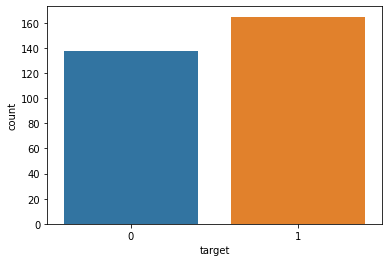

In [ ]:
# data['target'].value_counts().plot(kind = 'bar')
sns.countplot(data['target'])

In [ ]:
print("Percentage of patience without heart problems: "+str(round(data.target.value_counts()[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(data.target.value_counts()[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Checking correlation between columns

In [ ]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

## Analysing the "Sex" feature

In [ ]:
data.sex.unique()

array([1, 0], dtype=int64)

As we can see, the sex feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

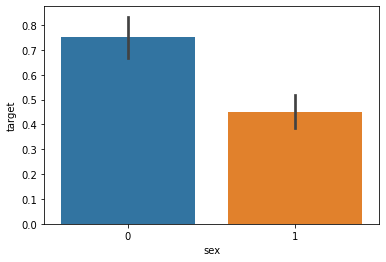

In [ ]:
sns.barplot(data.sex, data.target)

We notice, that females are more likely to have heart problem than males

## Analysing the "Chest Pain Type" feature

In [ ]:
data.cp.unique()

array([3, 2, 1, 0], dtype=int64)

cp: chest pain type
* -- Value 0: asymptomatic (không có triệu chứng)
* -- Value 1: atypical angina (đau thắt ngực không điển hình)
* -- Value 2: non-anginal pain (đau không thắt ngực)
*-- Value 3: typical angina (đau thắt ngực điển hình)


<AxesSubplot:xlabel='cp', ylabel='target'>

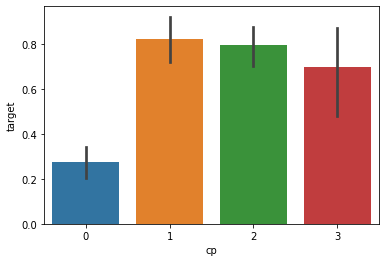

In [ ]:
sns.barplot(data.cp, data.target)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

## Analysing the FBS feature

> **fasting blood sugar** (lượng đường trong máu) larger than 120 mg/dl (1 true). Less than 100 mg/dL (5.6 mmol/L) is normal, and 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes.

In [ ]:
data.fbs.unique()

array([1, 0], dtype=int64)

In [ ]:
data.fbs.describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

*the FBS feature varies between 0 and 1, denoting normal state and prediabetes considered*

## Analysing the restecg feature 

In [ ]:
data['restecg'].unique()

array([0, 1, 2], dtype=int64)

restecg: resting electrocardiographic results
* -- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
* -- Value 1: normal
* -- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)


<AxesSubplot:xlabel='restecg', ylabel='target'>

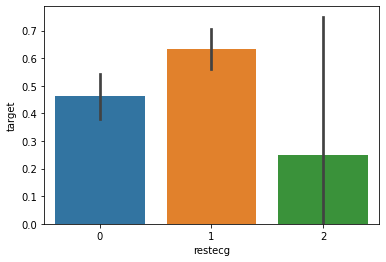

In [ ]:
sns.barplot(data.restecg, data.target)

==> people having restecg '1' and '0' are much likely to have a heart attack than those with restecg '2'

## Analysing the "exang" feature

> exercise-induced angina (đau thắt ngực lúc tập thể dục)(1 = yes). \
Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease(bệnh động mạch vành).


In [ ]:
data["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

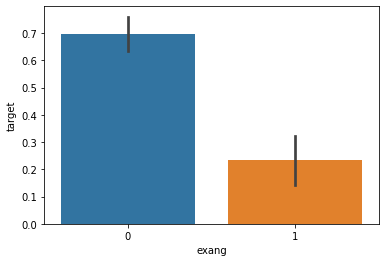

In [ ]:
sns.barplot(data["exang"], data.target)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

## Analysing the Slope feature

In [ ]:
data.slope.unique()

array([0, 2, 1], dtype=int64)

slope: the slope of the peak exercise ST segment \
0: downsloping; 1: flat; 2: upsloping


<AxesSubplot:xlabel='slope', ylabel='target'>

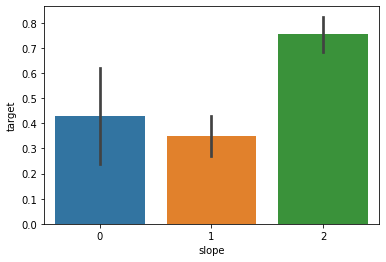

In [ ]:
sns.barplot(data.slope, data.target)

slope '2' dominates the percentile

## Analysing the "ca" feature

> ca—number of major vessels (0–3) colored by fluoroscopy.

In [ ]:
data.ca.unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='target'>

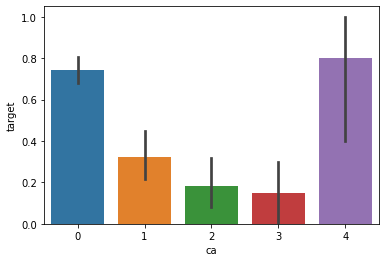

In [ ]:
sns.barplot(data.ca, data.target)
# sns.countplot(data= df2, x='cp',hue='target')

<AxesSubplot:xlabel='ca', ylabel='count'>

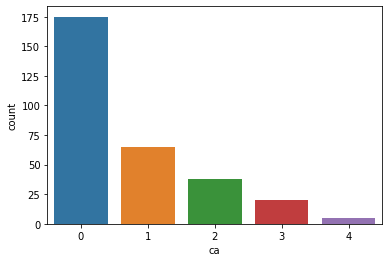

In [ ]:
sns.countplot(data.ca)

ca=4 has astonishingly large number of heart patients

## analysing the "thal" feature

> thalassemia (bệnh thiếu hồng cầu)

In [ ]:
data.thal.unique()

array([1, 2, 3, 0], dtype=int64)

thal
Results of the blood flow observed via the radioactive dye.

* Value 0: NULL (dropped from the dataset previously)
* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)


<AxesSubplot:xlabel='thal', ylabel='count'>

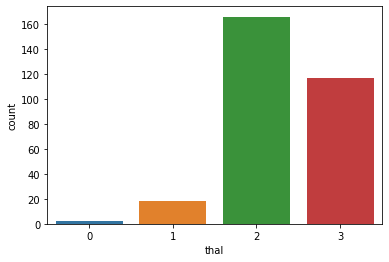

In [ ]:
sns.countplot(data.thal)

<AxesSubplot:xlabel='thal', ylabel='target'>

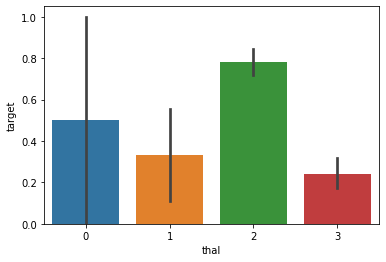

In [ ]:
sns.barplot(data.thal, data.target)

<AxesSubplot:xlabel='thal', ylabel='Density'>

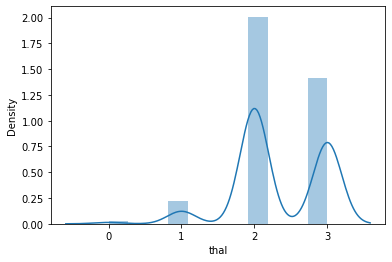

In [ ]:
sns.distplot(data.thal)

## Extra views on "age", "chol", "thalach", and "oldpeak"

AxesSubplot(0.125,0.125;0.775x0.755)


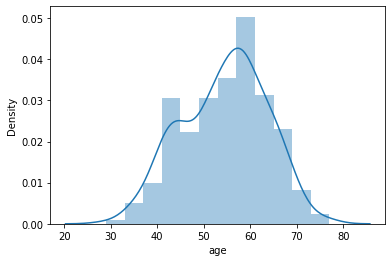

In [ ]:
print(sns.distplot(data["age"]))

AxesSubplot(0.125,0.125;0.775x0.755)


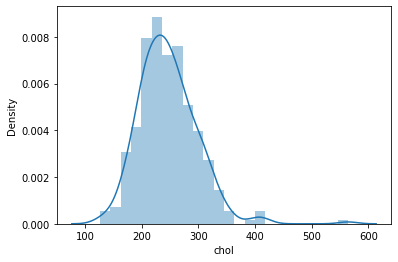

In [ ]:
print(sns.distplot(data["chol"]))

AxesSubplot(0.125,0.125;0.775x0.755)


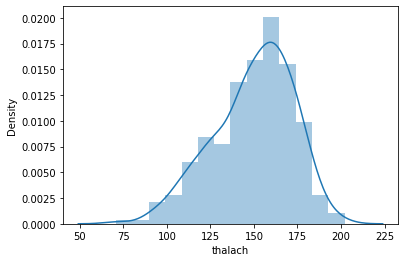

In [ ]:
print(sns.distplot(data["thalach"]))

AxesSubplot(0.125,0.125;0.775x0.755)


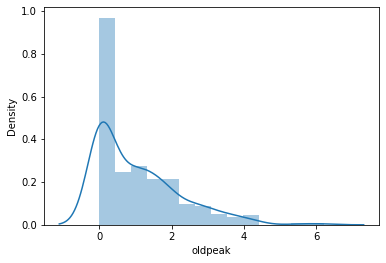

In [ ]:
print(sns.distplot(data["oldpeak"]))

# Panda profiling

In [ ]:
!yes | pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quiet 

In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train test split

In [ ]:
X = data.drop("target", axis =1).values
y = data.target.values

In [ ]:
print(X.shape, y.shape)

(303, 13) (303,)


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


# Models Fitting

In [ ]:
def result(score, model):
    print(f"The accuracy score achieved using {model.__class__.__name__} is: {round(score*100, 2)} %")

In [ ]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
lr_score = accuracy_score(y_pred_lr, y_test)
result(lr_score, lr)

The accuracy score achieved using LogisticRegression is: 85.25 %


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
nb_score = accuracy_score(y_pred_nb, y_test)
result(nb_score, nb)

The accuracy score achieved using GaussianNB is: 85.25 %


## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
svm_score = accuracy_score(y_pred_svm, y_test)
result(svm_score, svm)

The accuracy score achieved using SVC is: 81.97 %


## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
knn_score = accuracy_score(y_pred_knn, y_test)
result(knn_score, knn)

The accuracy score achieved using KNeighborsClassifier is: 67.21 %


## Decision tree

In [ ]:
# !pip install spicy

In [ ]:
# !pip install numpy==1.19.5

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
dt_score = accuracy_score(y_pred_dt, y_test)
result(dt_score, dt)

The accuracy score achieved using DecisionTreeClassifier is: 81.97 %


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
rf_score = accuracy_score(y_pred_rf, y_test)
result(rf_score, rf)

The accuracy score achieved using RandomForestClassifier is: 90.16 %


## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
xgb_score = accuracy_score(y_pred_xgb, y_test)
result(xgb_score, xgb_model)

The accuracy score achieved using XGBClassifier is: 78.69 %


## Neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

In [ ]:
# del model

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim = 13))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss = 'binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-traina

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=1000, verbose=0)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


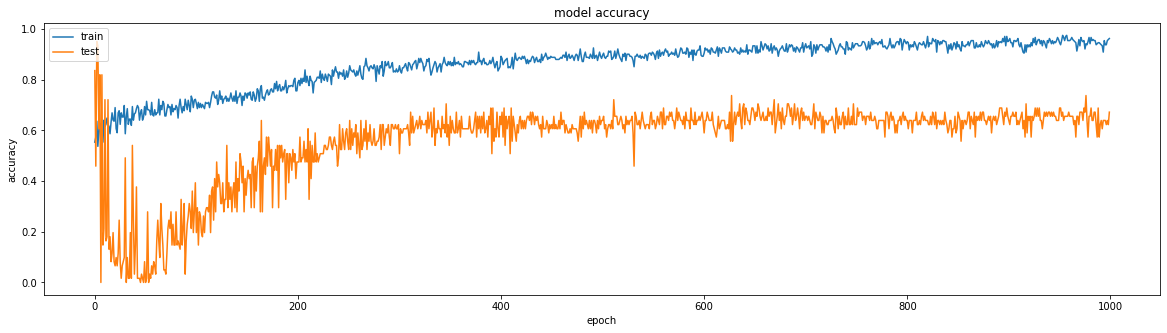

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


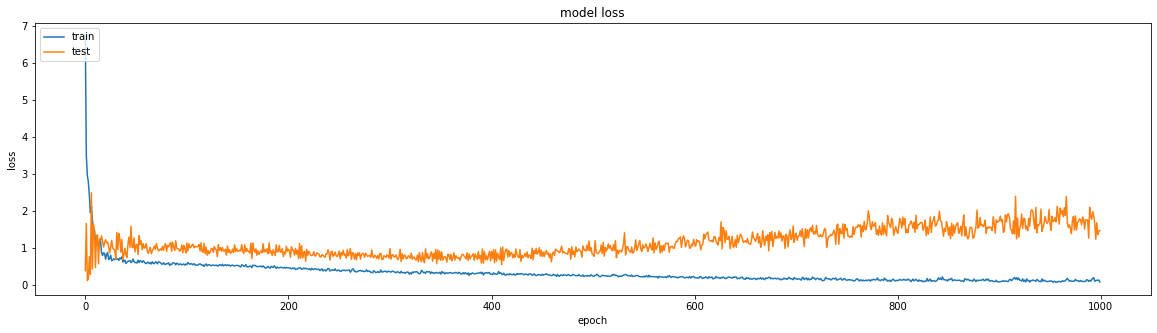

In [ ]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9672


[0.17119325697422028, 0.9672130942344666]

In [ ]:
from numpy import mean
nn_score = model.evaluate(X_test, y_test)[1]
result(nn_score, model=model)

2/2 [==============================] - 0s 997us/step - loss: 0.1712 - accuracy: 0.9672
The accuracy score achieved using Sequential is: 96.72 %


In [ ]:
scores = [lr_score, nb_score, svm_score, knn_score, dt_score, rf_score,xgb_score, nn_score]
algorithms = [lr, nb, svm, knn, dt, rf, xgb_model, model]

for score, model in zip(scores, algorithms):
    result(score=score, model=model)

The accuracy score achieved using LogisticRegression is: 85.25 %
The accuracy score achieved using GaussianNB is: 85.25 %
The accuracy score achieved using SVC is: 81.97 %
The accuracy score achieved using KNeighborsClassifier is: 67.21 %
The accuracy score achieved using DecisionTreeClassifier is: 81.97 %
The accuracy score achieved using RandomForestClassifier is: 90.16 %
The accuracy score achieved using XGBClassifier is: 78.69 %
The accuracy score achieved using Sequential is: 96.72 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

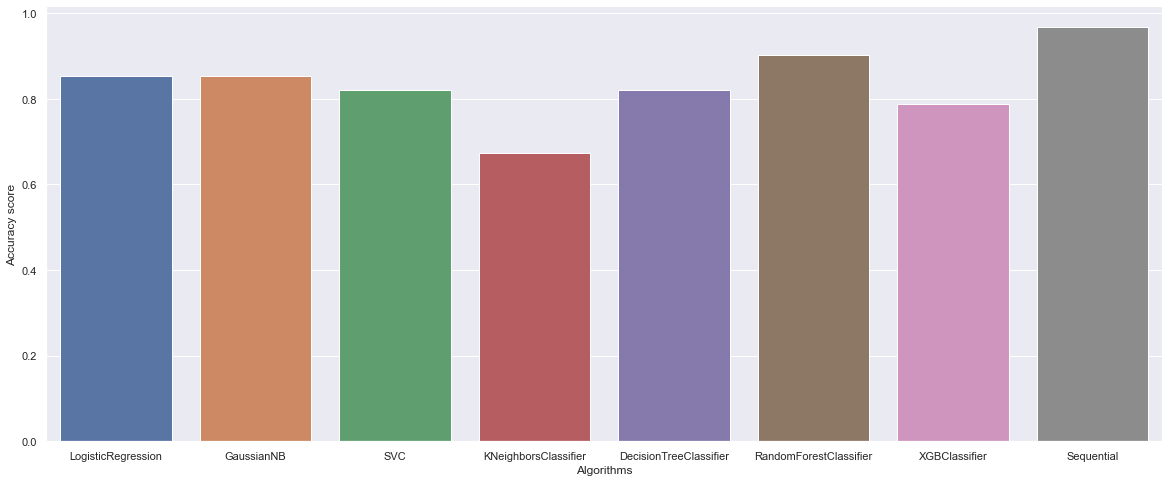

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
names = [m.__class__.__name__ for m in algorithms]
sns.barplot(names,scores)

## Data Visualization

In [ ]:
df2 = data.copy()
sns.set(rc={'figure.figsize':(10,8)})

Text(0.5, 1.0, 'Gender v/s target\n')

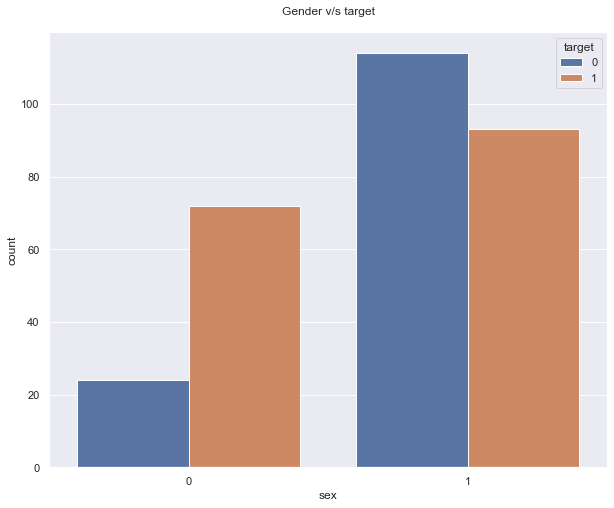

In [ ]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

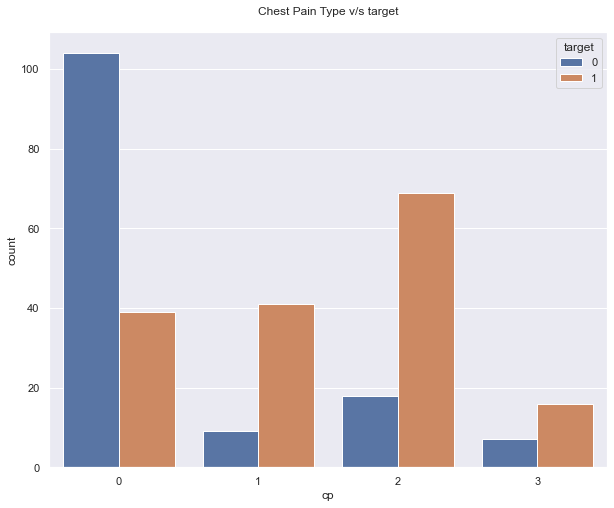

In [ ]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


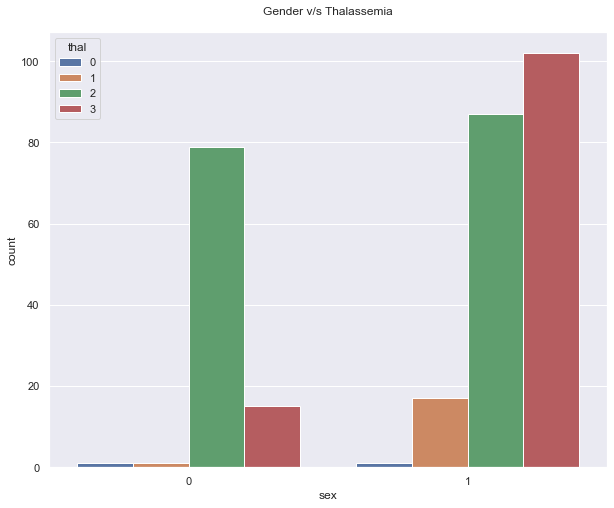

In [ ]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

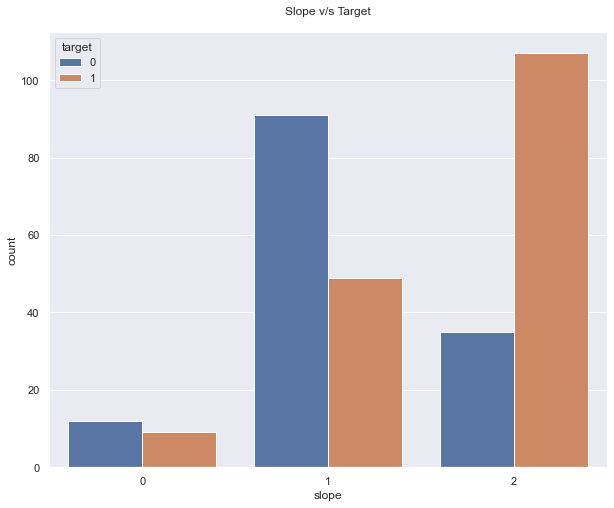

In [ ]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

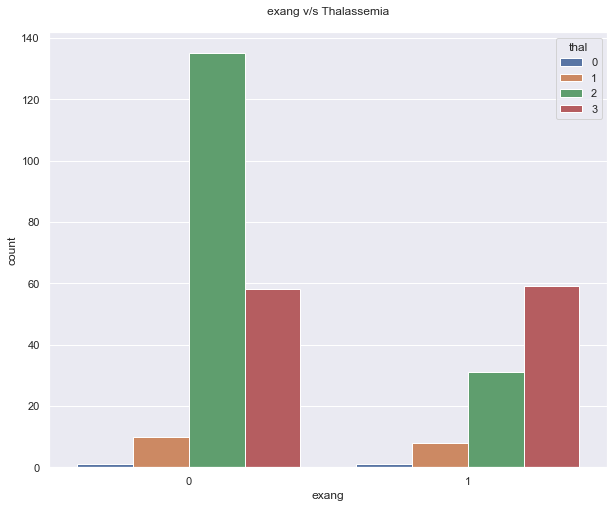

In [ ]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

### 2.Distplot

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

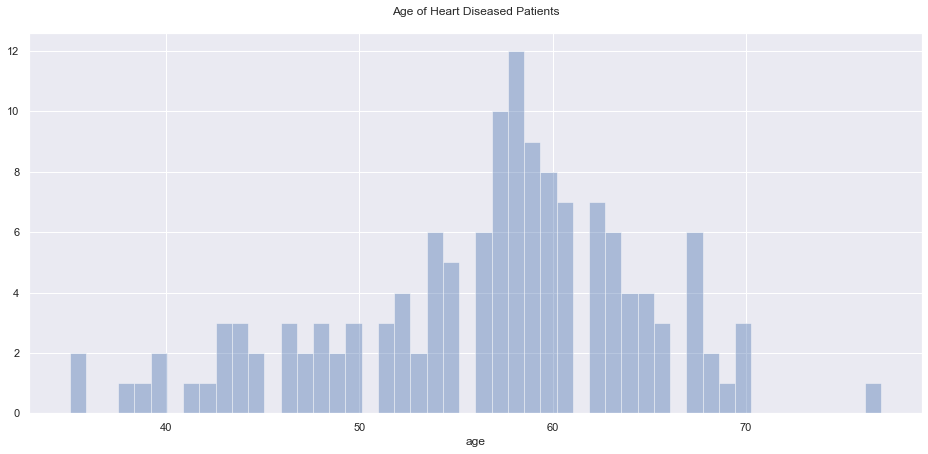

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

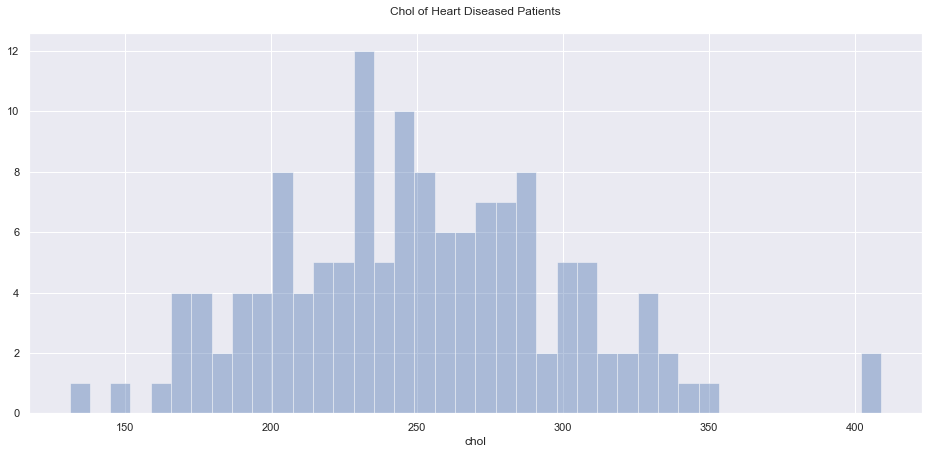

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

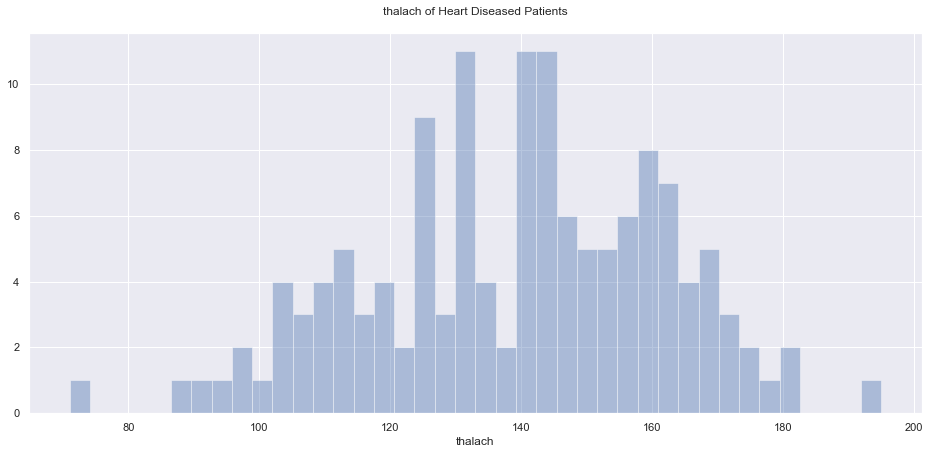

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

### Joinplot

In [ ]:
df3 = data[data['target']==0]

Age vs trestbps(Heart Diseased Patinets)


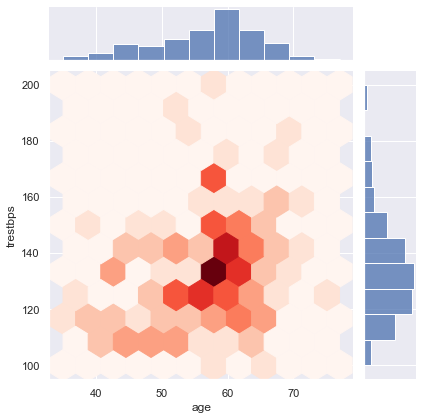

In [ ]:
pal = sns.light_palette("blue", as_cmap=True)

print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'           
              )

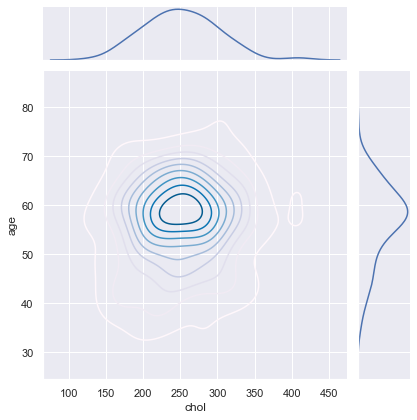

In [ ]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

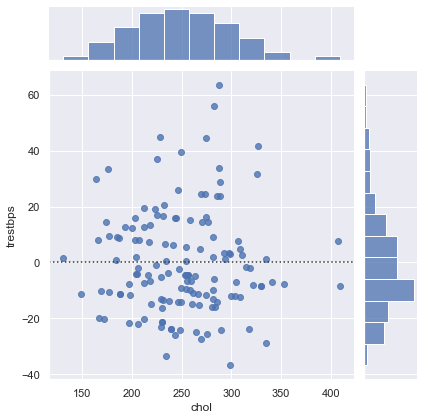

In [ ]:
sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

### Boxplot / violinplot

<AxesSubplot:xlabel='target', ylabel='age'>

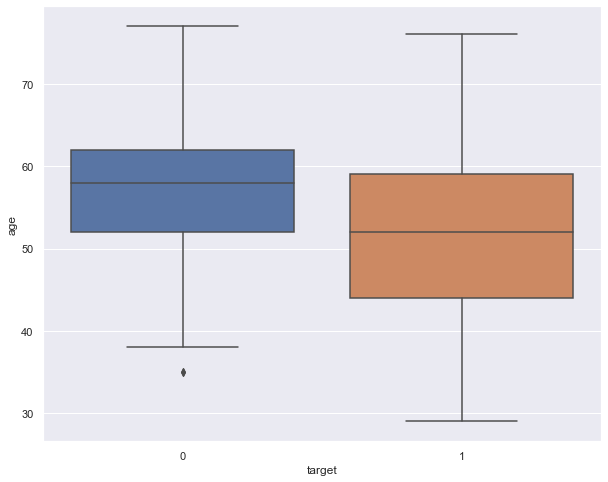

In [ ]:
sns.boxplot(data=df2,x='target',y='age')

<AxesSubplot:xlabel='ca', ylabel='age'>

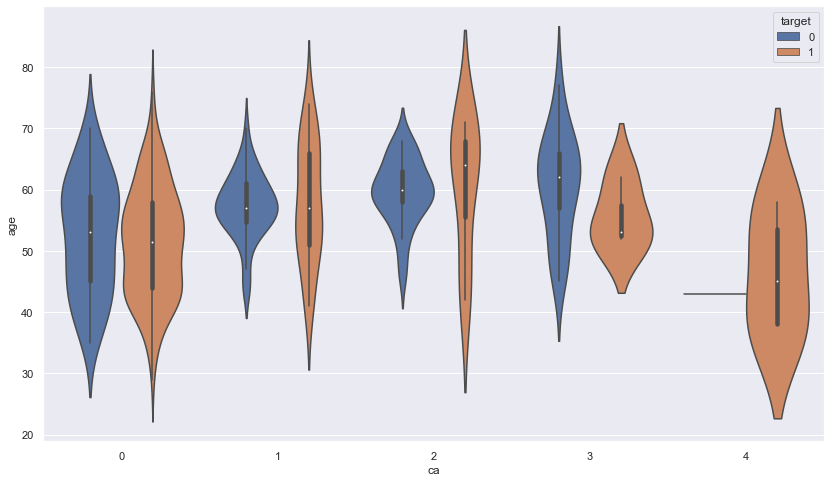

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

<AxesSubplot:xlabel='cp', ylabel='thalach'>

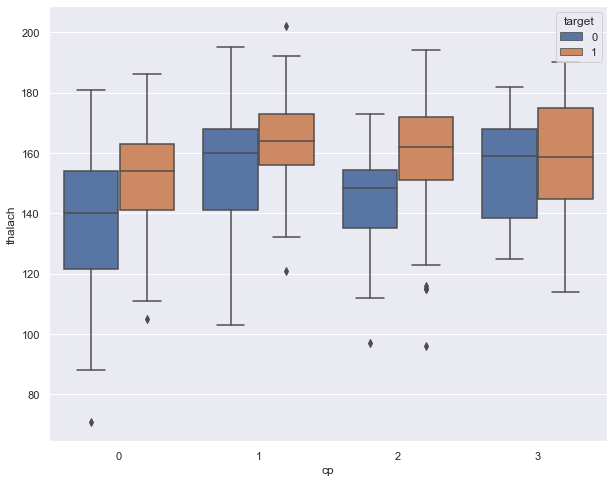

In [ ]:
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

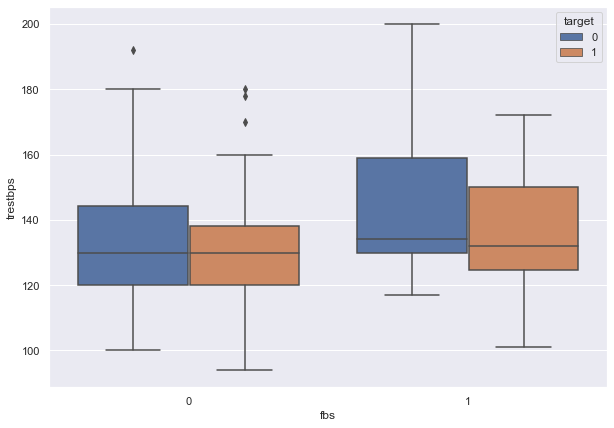

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

<AxesSubplot:xlabel='exang', ylabel='oldpeak'>

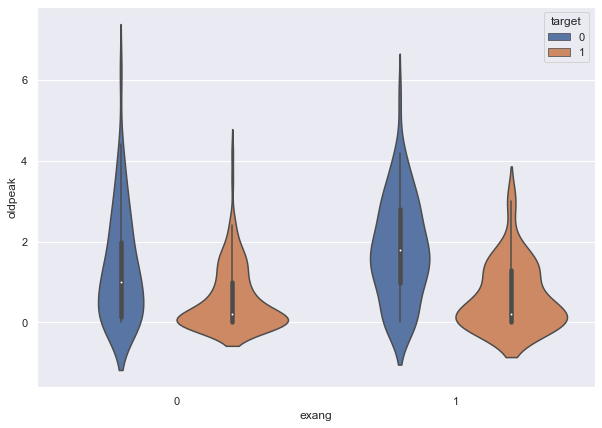

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

<AxesSubplot:xlabel='slope', ylabel='thalach'>

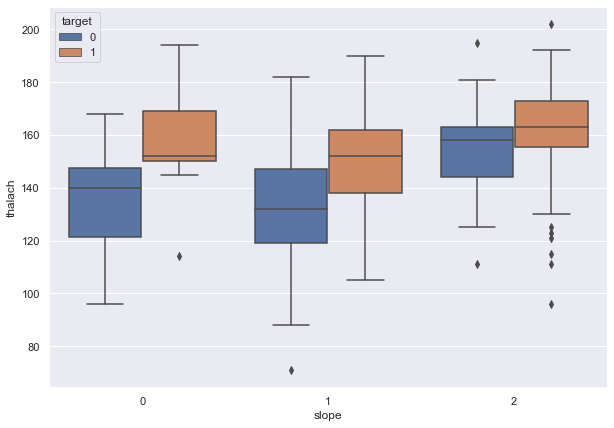

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

<AxesSubplot:xlabel='thal', ylabel='oldpeak'>

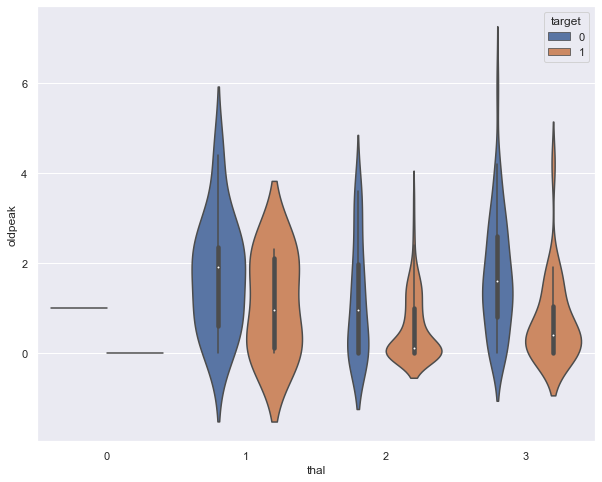

In [ ]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

<AxesSubplot:xlabel='target', ylabel='thalach'>

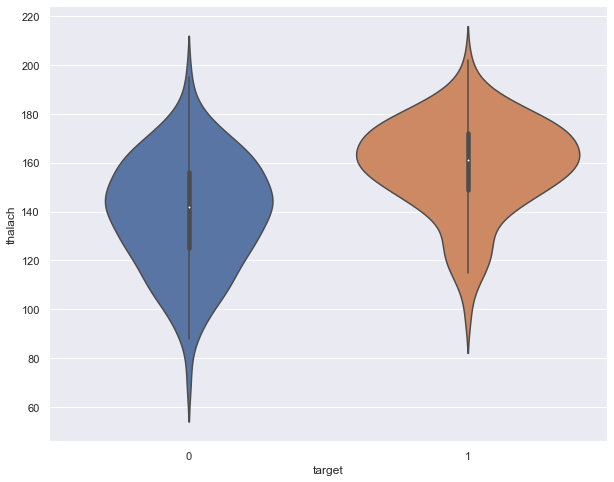

In [ ]:
sns.violinplot(data=df2,x='target',y='thalach')

### cluster map

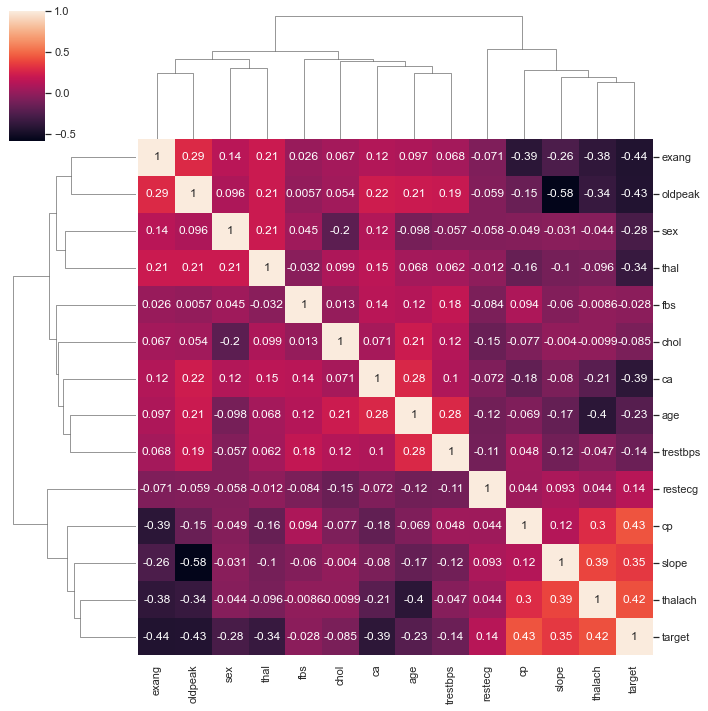

In [ ]:
sns.clustermap(data.corr(),annot=True)

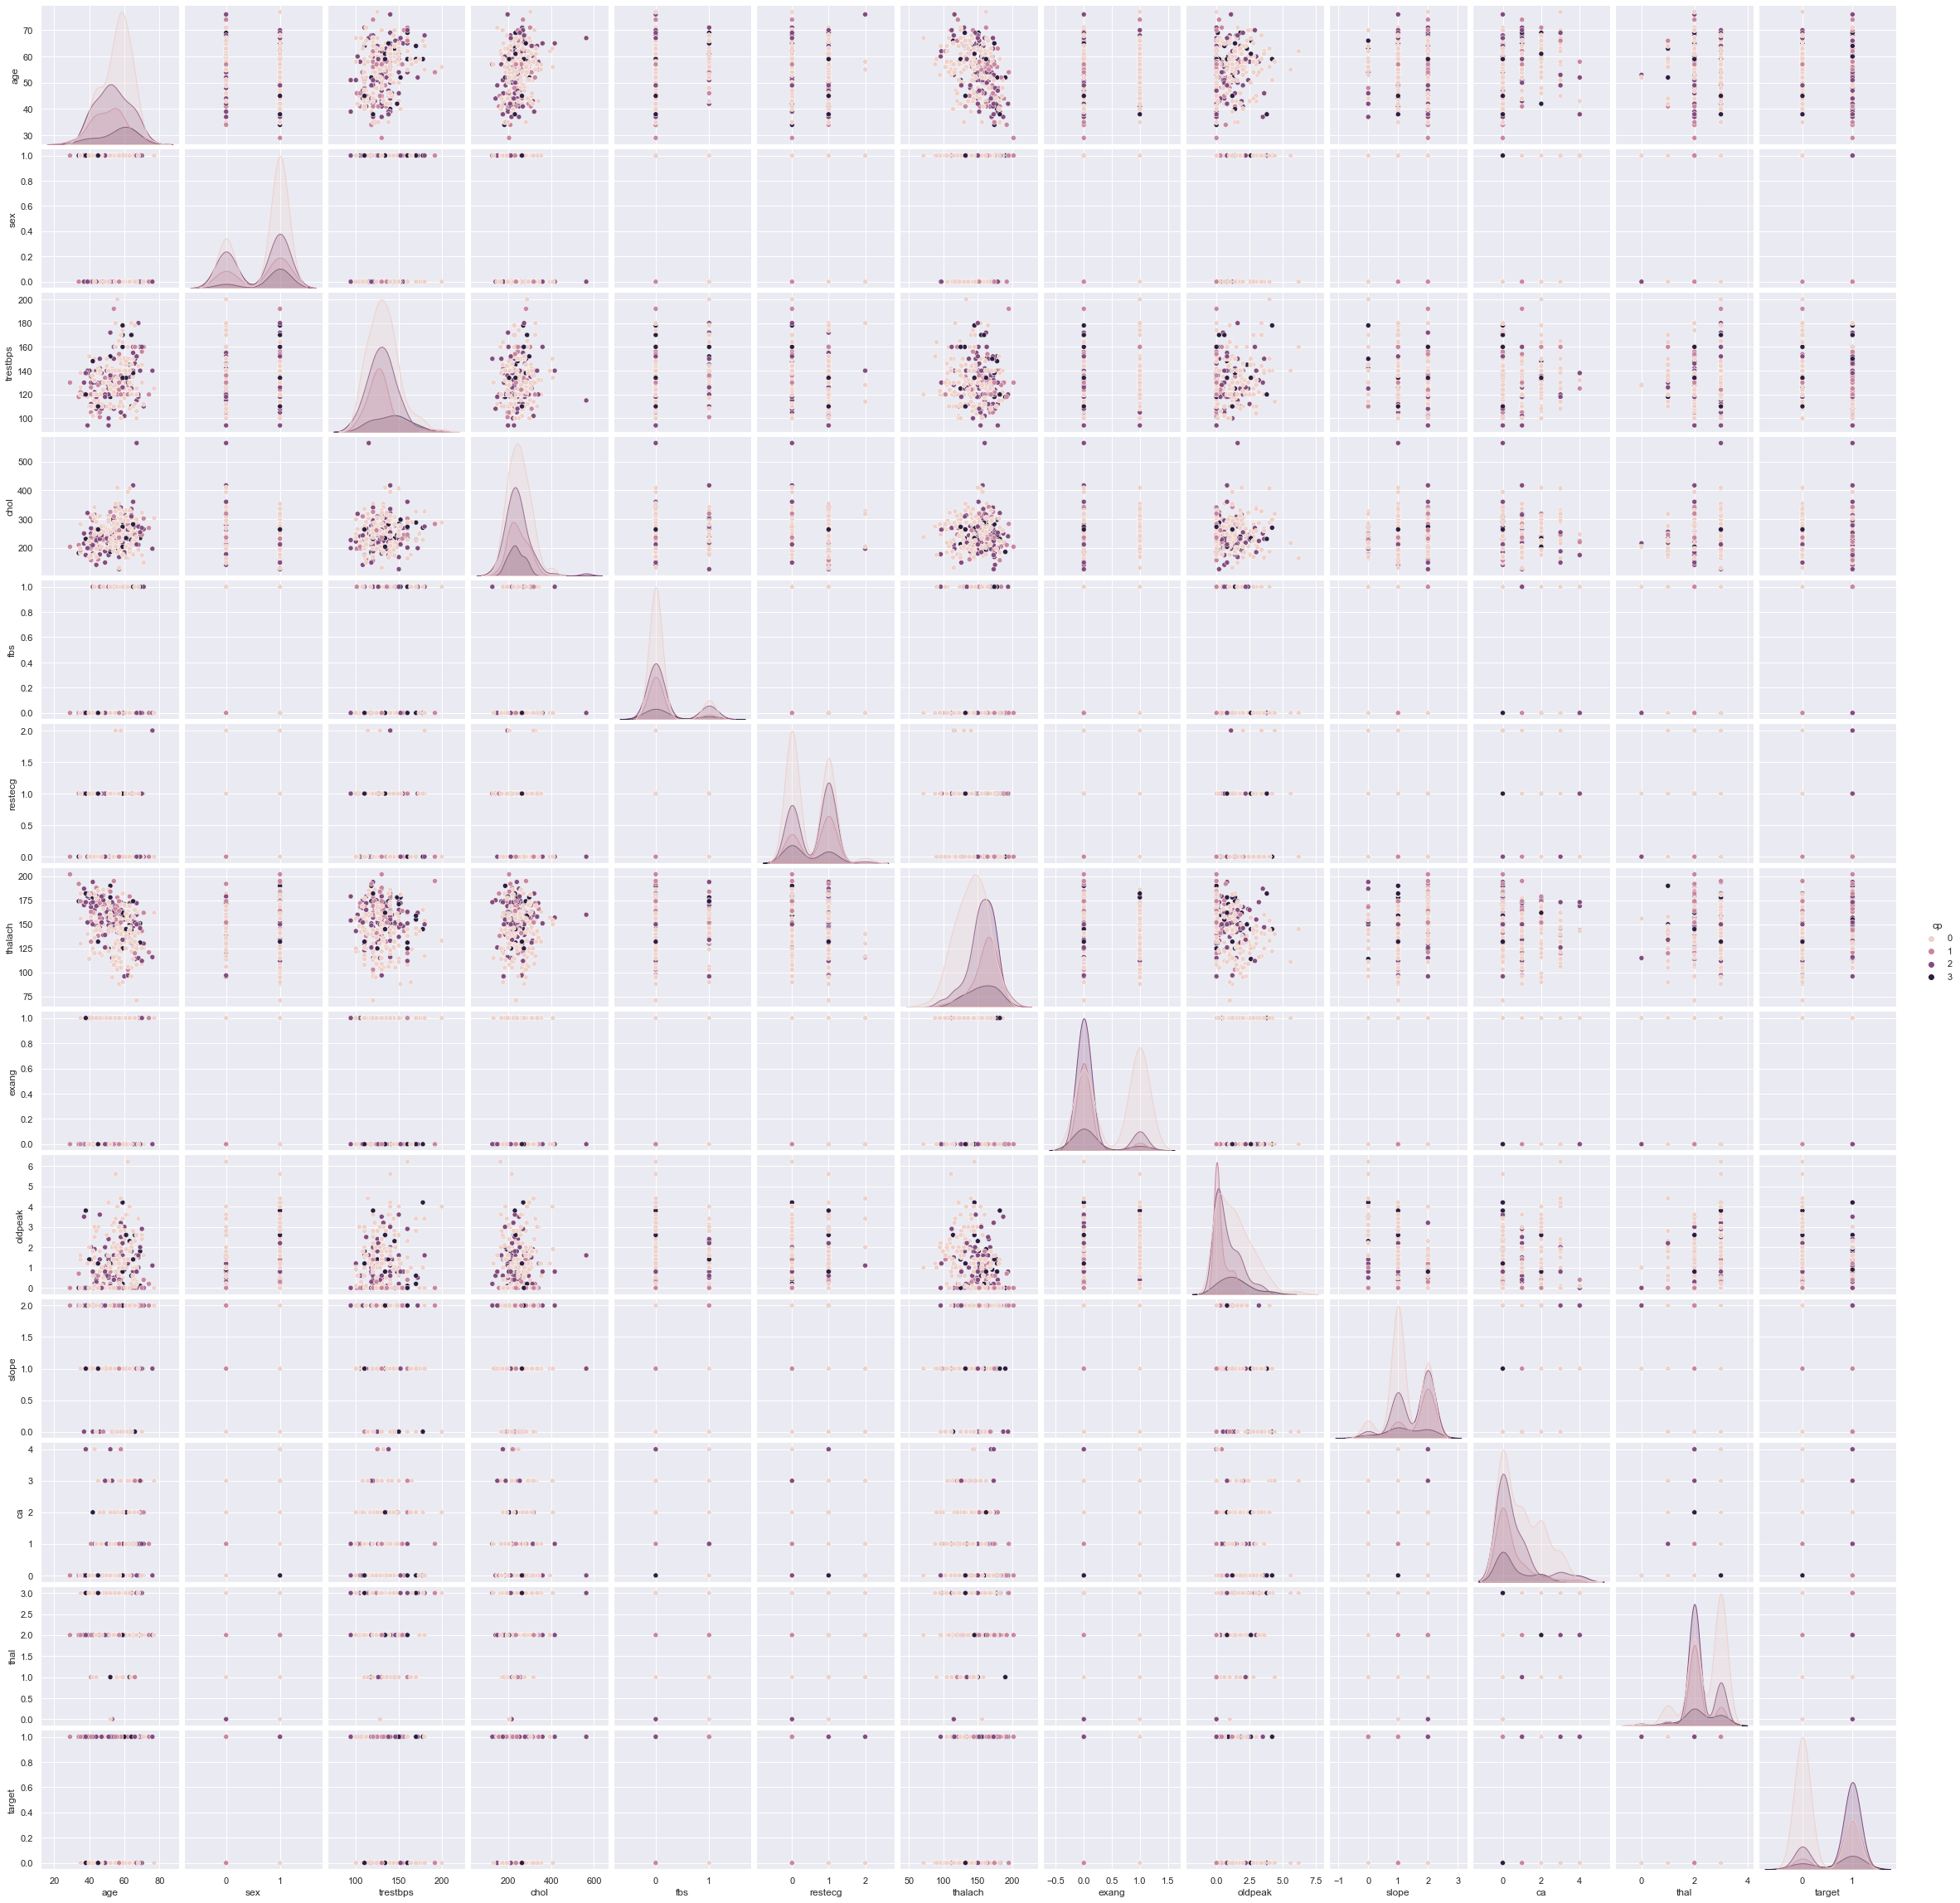

In [ ]:
sns.pairplot(data,hue='cp')